<a href="https://colab.research.google.com/github/sajacaros/bootcamp_colab/blob/main/ai6_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/ai6th/data/titanic/'

train_path = path + 'train.csv'
test_path = path + 'test.csv'
submission_path = path + 'gender_submission.csv'

In [3]:
train_df = pd.read_csv(train_path)
test = pd.read_csv(test_path)
submission = pd.read_csv(submission_path)

In [4]:
# 필수 체크 항목
# 1. 결측치 체크
# 2. dtype이 Object인 column 찾기
# 3. target value distribution 체크

In [5]:
# 1. 결측치 체크
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_df.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [7]:
train_df[train_df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [8]:
# 2. dtype이 Object인 column 찾기
train_df.columns[train_df.dtypes == 'object']

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [9]:
# 3. target value distribution 체크
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

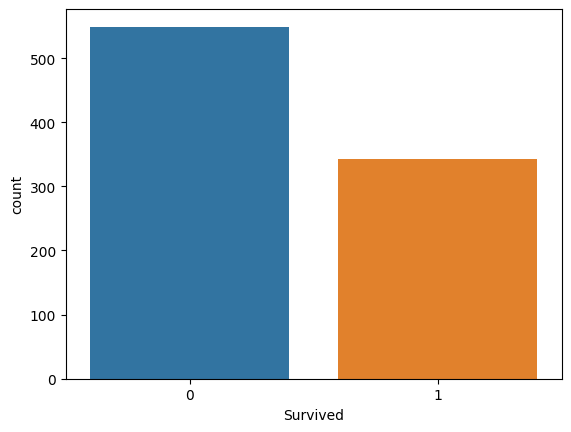

In [10]:
sns.countplot(data=train_df, x='Survived')

In [11]:
# feature engineering
# 머신러닝 모델에 학습하기 전에 앞서서 확인한 데이터에 처리는 반대시 해야함
# 결측치는 없어야 하고 object 타입도 없어야 한다.

In [12]:
# 1. Cabin의 유무가 Survived에 영향이 있는가?
# Cabin이 없는 사람들 중 생존 비율
train_df[train_df.Cabin.isnull()].Survived.mean()

0.29985443959243085

In [13]:
# Cabin이 있는 사람들 중 생존 비율
train_df[train_df.Cabin.notnull()].Survived.mean()

0.6666666666666666

In [14]:
train = train_df.copy()

In [15]:
# train['IsCabin'] = train.Cabin.notnull()*1
train.loc[train.Cabin.notnull(), 'IsCabin'] = 1
train.loc[train.Cabin.isnull(), 'IsCabin'] = 0
train.IsCabin.mean()

0.22895622895622897

In [16]:
# Family Size feature 만들기
train['FamilySize'] = train['SibSp'] + train['Parch']

In [17]:
# 불필요한 column 제거
train = train.drop(columns=['PassengerId', 'Name', 'SibSp', 'Parch', 'Cabin', 'Ticket'])

In [18]:
train.isnull().mean()

Survived      0.000000
Pclass        0.000000
Sex           0.000000
Age           0.198653
Fare          0.000000
Embarked      0.002245
IsCabin       0.000000
FamilySize    0.000000
dtype: float64

In [19]:
train.Age.describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
# 결측치 채우기
train.Age = train.Age.fillna(train.Age.median())
train.Age.describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    object 
 6   IsCabin     891 non-null    float64
 7   FamilySize  891 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 55.8+ KB


In [22]:
# 결측행 지우기
train = train.dropna()
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    889 non-null    int64  
 1   Pclass      889 non-null    int64  
 2   Sex         889 non-null    object 
 3   Age         889 non-null    float64
 4   Fare        889 non-null    float64
 5   Embarked    889 non-null    object 
 6   IsCabin     889 non-null    float64
 7   FamilySize  889 non-null    int64  
dtypes: float64(3), int64(3), object(2)
memory usage: 62.5+ KB


In [23]:
# Encoding categorical feature

# 1) Ordinal encoding
# pd.factorize()

# 2) One-hot encoding
# pd.get_dummies()

In [24]:
# Ordinal encoding
# sort를 안해주면 값이 바뀔수 있음
train.Sex = pd.factorize(train.Sex, sort=True)[0] # factorize의 결과는 tuple
# train.Sex.map({'female':0, 'male':1})

<ipython-input-24-03263eb78f8f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.Sex = pd.factorize(train.Sex, sort=True)[0] # factorize의 결과는 tuple


In [25]:
# One-hot encoding
train = pd.get_dummies(data=train, columns=['Embarked'])
train.head()

,Survived,Pclass,Sex,Age,Fare,IsCabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,7.2500,0.0,1,0,0,1
1,1,1,0,38.0,71.2833,1.0,1,1,0,0
2,1,3,0,26.0,7.9250,0.0,0,0,0,1
3,1,1,0,35.0,53.1000,1.0,1,0,0,1
4,0,3,1,35.0,8.0500,0.0,0,0,0,1


In [26]:
# data setting for training
from sklearn.model_selection import train_test_split

X = train.drop(columns=['Survived']) # feature vector
y = train.Survived  # target value

train_idx, valid_idx = train_test_split(range(len(train)), test_size=0.2, shuffle=True, random_state=42)
print(len(train_idx), len(valid_idx))

711 178


In [27]:
print(y.iloc[train_idx].mean(), y.iloc[valid_idx].mean())

0.38115330520393814 0.38764044943820225


In [28]:
# sklearn에서 학습을 하는 방법
# 1. 사용할 함수를 불러온다
# 2. 해당 함수를 선언한다
# 3. fit()

In [29]:
from sklearn.linear_model import LinearRegression, LogisticRegression

reg = LinearRegression()
reg.fit(X.iloc[train_idx], y.iloc[train_idx])

lreg = LogisticRegression()
lreg.fit(X.iloc[train_idx], y.iloc[train_idx])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
# 회귀 성능 비교
from sklearn.metrics import mean_squared_error # MSE

reg_pred = reg.predict(X.iloc[train_idx])
lreg_pred = lreg.predict_proba(X.iloc[train_idx])[:, 1]

print(f"Linear mse : {mean_squared_error(y.iloc[train_idx], reg_pred):.4f}")
print(f"Logistic mse : {mean_squared_error(y.iloc[train_idx], lreg_pred):.4f}")

Linear mse : 0.1414
Logistic mse : 0.1400


In [33]:
test_reg_pred = reg.predict(X.iloc[valid_idx])
test_lreg_pred = lreg.predict_proba(X.iloc[valid_idx])[:, 1]
print(f"Linear mse : {mean_squared_error(y.iloc[valid_idx], test_reg_pred):.4f}")
print(f"Logistic mse : {mean_squared_error(y.iloc[valid_idx], test_lreg_pred):.4f}")

Linear mse : 0.1445
Logistic mse : 0.1406
